<a href="https://colab.research.google.com/github/imk1raa/imk1raa/blob/main/kira_afremov_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/imk1raa

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-2-78147256a09b>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsne_df['Label'].replace(0.0, 'Malignant',inplace=True)


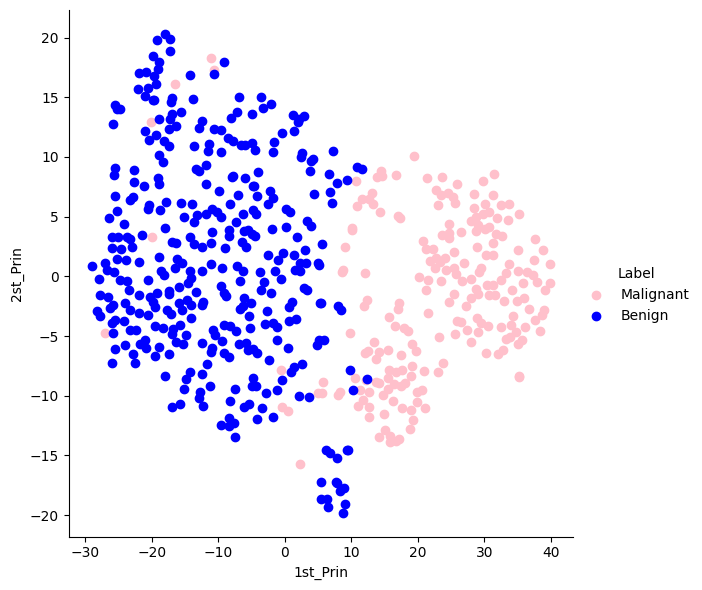

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


breast_cancer = load_breast_cancer()

breast_cancer.data.shape

breast_cancer.target.shape

raw_data = breast_cancer.data

normalized_data = StandardScaler().fit_transform(raw_data)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)


tsne_df = pd.DataFrame(np.vstack((tsne_result.T, breast_cancer.target)).T,
                          columns=['1st_Prin', '2st_Prin', 'Label'])


tsne_df['Label'].replace(0.0, 'Malignant',inplace=True)
tsne_df['Label'].replace(1.0, 'Benign',inplace=True)

tsne_df.value_counts()
# Create Plot
# Set palette of colors for different labels
pal = dict(Malignant="pink", Benign="blue")

ax = sns.FacetGrid(tsne_df, hue='Label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2st_Prin').\
                   add_legend()

plt.show()




3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [3]:

from sklearn.model_selection import train_test_split
x = breast_cancer.data
y = breast_cancer.target

test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


model_decision_tree = DecisionTreeClassifier(max_depth=1000 ,criterion='gini' )
model_decision_tree.fit(x_train, y_train)
y_pred = model_decision_tree.predict(x_test)


print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))



accuracy_score= 0.9090909090909091
confusion_matrix=
 [[48  8]
 [ 5 82]]
precision_score= 0.9111111111111111
recall_score= 0.9425287356321839
f1_score= 0.9265536723163842


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

model_random_forest = RandomForestClassifier(n_estimators=19, max_depth= None, criterion='entropy')
model_random_forest.fit(x_train, y_train)
y_pred = model_random_forest.predict(x_test)


print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

accuracy_score= 0.9440559440559441
confusion_matrix=
 [[49  7]
 [ 1 86]]
precision_score= 0.9247311827956989
recall_score= 0.9885057471264368
f1_score= 0.9555555555555556


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [23]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1, algorithm='SAMME')
model_adaboost.fit(x_train, y_train)
y_pred = model_adaboost.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


accuracy_score= 0.965034965034965
confusion_matrix=
 [[53  3]
 [ 2 85]]
precision_score= 0.9659090909090909
recall_score= 0.9770114942528736
f1_score= 0.9714285714285714


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1, algorithm='SAMME')
model_adaboost.fit(x_train, y_train)
y_pred = model_adaboost.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))
print('-------------------------------------')

model_random_forest = RandomForestClassifier(n_estimators=100, max_depth= 50, criterion='gini')
model_random_forest.fit(x_train, y_train)
y_pred = model_random_forest.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))
print('-------------------------------------')

model_decision_tree = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy')
model_decision_tree.fit(x_train, y_train)
y_pred = model_decision_tree.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

print('f1score is the so the best major classifier so the winner is AdaBoost')





#

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


accuracy_score= 0.965034965034965
confusion_matrix=
 [[53  3]
 [ 2 85]]
precision_score= 0.9659090909090909
recall_score= 0.9770114942528736
f1_score= 0.9714285714285714
-------------------------------------
accuracy_score= 0.958041958041958
confusion_matrix=
 [[53  3]
 [ 3 84]]
precision_score= 0.9655172413793104
recall_score= 0.9655172413793104
f1_score= 0.9655172413793104
-------------------------------------
accuracy_score= 0.958041958041958
confusion_matrix=
 [[53  3]
 [ 3 84]]
precision_score= 0.9655172413793104
recall_score= 0.9655172413793104
f1_score= 0.9655172413793104
f1score is the so the best major classifier so the winner is AdaBoost
